In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load laptop price data

laptop_data = pd.read_csv('laptop_price.csv', encoding='latin-1')
df = laptop_data.copy()
df.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [4]:
df = df[['Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros']]

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Exploratory Data Analysis and Data Cleaning

In [5]:
# check for null
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
# check duplicated rows
df.duplicated().sum()

28

In [7]:
# check information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [8]:
# pylint: disable=undefined-variable
# From the info above, we see that the dataset have 10 categorical and 2 numerical features.
# We can separate the columns by selecting the data types using the select_dtypes function.
cat_variables = df.select_dtypes(include='object').columns

# since the only one in the dataset is float64. 
# We can also include a list other numerical data types float32, int32, int64
num_variables = df.select_dtypes(include='float64').columns 

cat_variables, num_variables

(Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
        'Memory', 'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price_euros'], dtype='object'))

In [9]:
# we can check the unique values and value counts for each column
# Unique values

def UniqueValues(col):
    print(f'Unique values of {col} are: {df[col].unique()}')

for col in df.columns:
    UniqueValues(col)
    print('_'*100)

Unique values of Company are: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
____________________________________________________________________________________________________
Unique values of Product are: ['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'Pr

In [10]:
# Value counts for each column
def ValueCounts(col):
    print(f'Value counts of each {col} is: {df[col].value_counts()}')


for col in df.columns:
    ValueCounts(col)
    print('_'*100)


Value counts of each Company is: Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64
____________________________________________________________________________________________________
Value counts of each Product is: XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4

In [11]:
# At this point, we shall clean the data starting with the simplest.
# remove the GB from Ram and change the dtype to numeric
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = pd.to_numeric(df['Ram'])
df.rename(columns={'Ram':'Ram(GB)'}, inplace=True)

# let's remove kg in Weight and change dtype to numeric
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight'] = pd.to_numeric(df['Weight'])
df.rename(columns={'Weight':'Weight(kg)'}, inplace=True)

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


# Feature Engineering on the Memory feature

In [12]:
# The column Memory is an interesting one. It contains the memory size in GB and/or TB
# and storage types i.e. SSD, HDD, Hybrid or Flash storage. 
# There are some rows with both GB and TB i.e. 128GB SSD + 1TB HDD
# Inorder to arrive at the same deimension, we need to modify the Memory feature (i.e. Feature engineering)

# Let's see the value counts oof the Memory column again
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [13]:
# let's create a function that will split Memory column across the "+" character
def NewMemory():
    # convert all float to integer
    df['Memory'] = df['Memory'].astype(str).replace('\.0','', regex=True)
    # replace the GB string with space
    df['Memory'] = df['Memory'].str.replace('GB', '')
    # replace the TB string with the string '000'
    df['Memory'] = df['Memory'].str.replace('TB', '000')
    newdf = df['Memory']
    return newdf

split_memory = NewMemory().str.split("+", n=1, expand=True)
# split_memory

In [14]:
# Now our split_memory variable contains 2 columns:
# column 0 contains the left side of "+" character and
# column 1 contains the right side of the "+" character.
# we shall create 2 column MemoryLeft and MemoryRight and the one hot encode/map each storage type.
# later, we shall remove the storage type from the memory size and convert to numeric data types

# let's start by stripping the white spaces in MemoryLeft
def StripWhiteSpace(name, column):
    df[name] = split_memory[column]
    df[name] = df[name].str.strip()
    return df

# function to separate memory size from storage type
def RemoveStorageType(name):
    df[name] = df[name].str.replace(r'\D', '', regex=True)
    return df

# remove white space from MemoryLeft
df = StripWhiteSpace('MemoryLeft', 0)

def StorageTypeEncoder(name, value):
    df[name+'_'+value] = df[name].apply(lambda x:1 if value in x else 0)

storagetype = ['HDD', 'SSD', 'Hybrid', 'FlashStorage']
for value in storagetype:
    StorageTypeEncoder('MemoryLeft', value)

# separate memory size from storage type
df = RemoveStorageType('MemoryLeft')

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros,MemoryLeft,MemoryLeft_HDD,MemoryLeft_SSD,MemoryLeft_Hybrid,MemoryLeft_FlashStorage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,1,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,128,0,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,256,0,1,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,1,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,1,0,0


In [15]:
# add MemoryRight to the dataframe stripping off white space
StripWhiteSpace('MemoryRight', 1)

# fill none with 0 and one hot encode the storage type
df['MemoryRight'] = df['MemoryRight'].fillna("0")
for value in storagetype:
    StorageTypeEncoder('MemoryRight', value)

# separate memory size from storage type
RemoveStorageType('MemoryRight')

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,...,MemoryLeft,MemoryLeft_HDD,MemoryLeft_SSD,MemoryLeft_Hybrid,MemoryLeft_FlashStorage,MemoryRight,MemoryRight_HDD,MemoryRight_SSD,MemoryRight_Hybrid,MemoryRight_FlashStorage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,...,128,0,0,0,0,0,0,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,...,256,0,1,0,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,...,512,0,1,0,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,...,256,0,1,0,0,0,0,0,0,0


In [16]:
# convert MemoryLeft and MemoryRight to numeric datatypes
df['MemoryLeft'] = df['MemoryLeft'].astype('int')
df['MemoryRight'] = df['MemoryRight'].astype('int')

In [17]:
# group all corresponding storage types
df["HDD"] = df['MemoryLeft']*df['MemoryLeft_HDD'] + df['MemoryRight']*df['MemoryRight_HDD']
df["SSD"] = df['MemoryLeft']*df['MemoryLeft_SSD'] + df['MemoryRight']*df['MemoryRight_SSD']
df["Hybrid"] = df['MemoryLeft']*df['MemoryLeft_Hybrid'] + df['MemoryRight']*df['MemoryRight_Hybrid']
df["FlashStorage"] = df['MemoryLeft']*df['MemoryLeft_FlashStorage'] + df['MemoryRight']*df['MemoryRight_FlashStorage']

In [18]:
# drop all unnecessary columns
df.drop(columns=['MemoryLeft', 'MemoryRight', 'Memory', 'MemoryLeft_HDD',
                 'MemoryRight_HDD', 'MemoryLeft_SSD', 'MemoryRight_SSD',
                 'MemoryLeft_Hybrid', 'MemoryRight_Hybrid', 'MemoryLeft_FlashStorage', 'MemoryRight_FlashStorage'], inplace=True)

df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Gpu,OpSys,Weight(kg),Price_euros,HDD,SSD,Hybrid,FlashStorage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,128,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,256,0,0


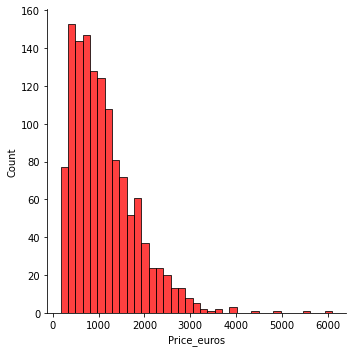

In [19]:
# Let's visualize the distribution of the Price in euros using seaborn

sns.displot(df['Price_euros'], color='red')

/Users/fernand/Dev/Laptop-price-prediction/laptop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/fernand/Dev/Laptop-price-prediction/laptop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/fernand/Dev/Laptop-price-prediction/laptop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

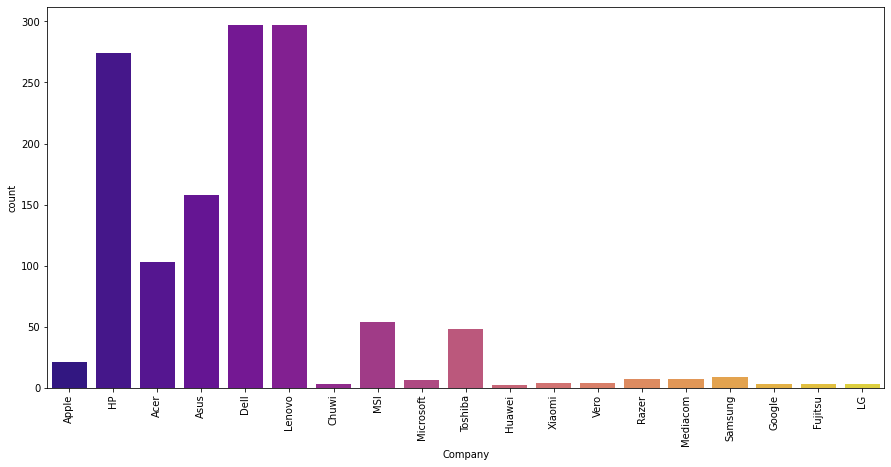

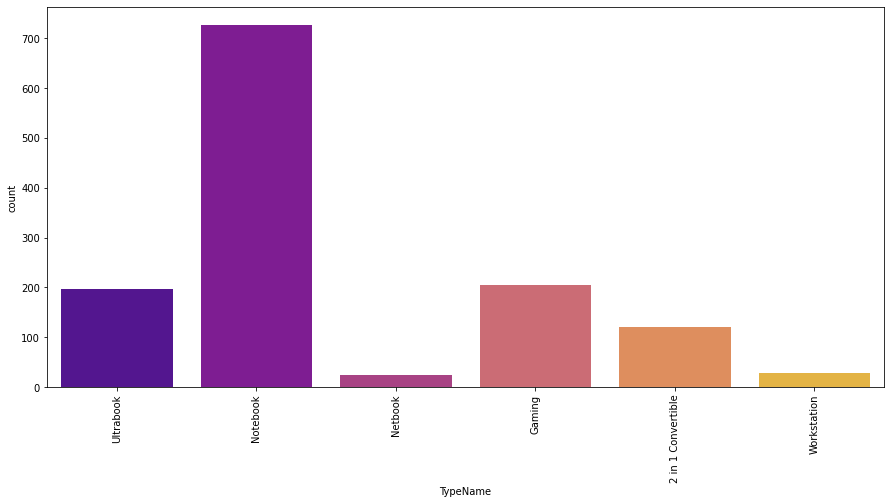

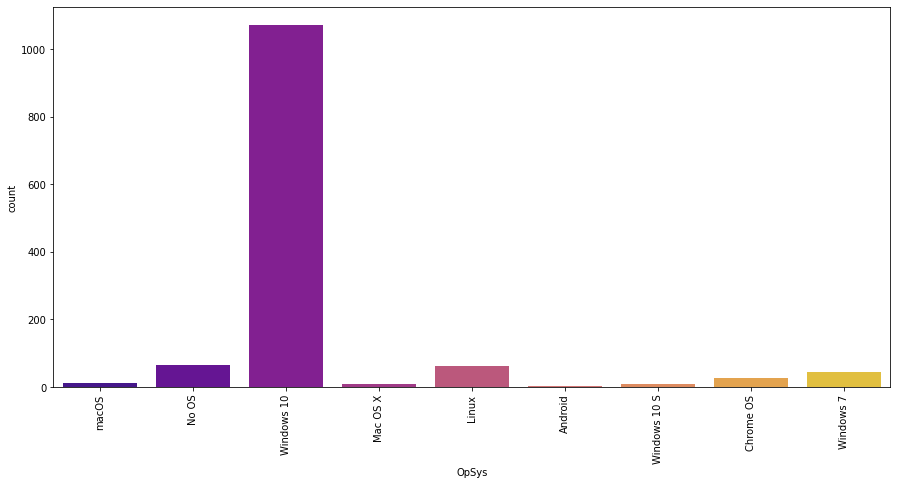

In [20]:
# Countplots for categorical variables

def CatCountPlot(col):
    plt.figure(figsize=(15, 7))
    sns.countplot(df[col], palette='plasma')
    plt.xticks(rotation='vertical')

cat_list = ['Company', 'TypeName', 'OpSys']
for col in cat_list:
    CatCountPlot(col)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

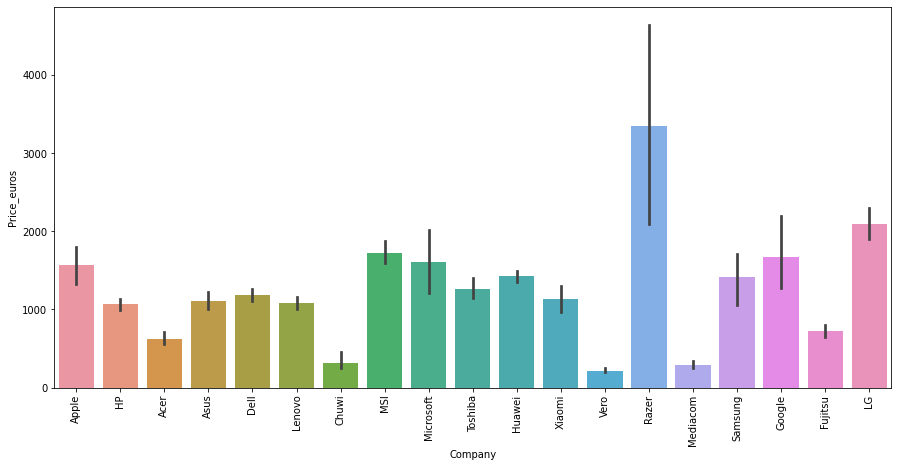

In [21]:
# let's create a barplot to the average price of each laptop brands

plt.figure(figsize=(15,7))
sns.barplot(x=df['Company'], y=df['Price_euros'])
plt.xticks(rotation = 'vertical')



In [22]:
# let's map company column
company_dict = {'Apple' : 1, 'HP' : 2 , 'Acer': 3, 'Asus': 4, 'Dell': 5, 'Lenovo': 6, 
                 'Chuwi': 7, 'MSI': 8, 'Microsoft': 9, 'Toshiba':10, 'Huawei':11, 'Xiaomi':12, 
                  'Vero': 13, 'Razer':14, 'Mediacom':15, 'Samsung':16, 'Google':17, 'Fujitsu':18,
                  'LG':19}

df['Company'] = df.Company.map(company_dict)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Gpu,OpSys,Weight(kg),Price_euros,HDD,SSD,Hybrid,FlashStorage
0,1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,128,0,0
1,1,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0
2,2,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,256,0,0
3,1,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,512,0,0
4,1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,256,0,0


/Users/fernand/Dev/Laptop-price-prediction/laptop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

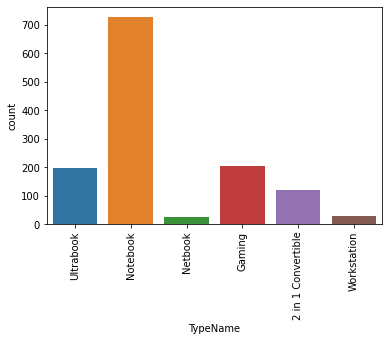

In [23]:
# let's see the different types of laptops
sns.countplot(df['TypeName'])
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

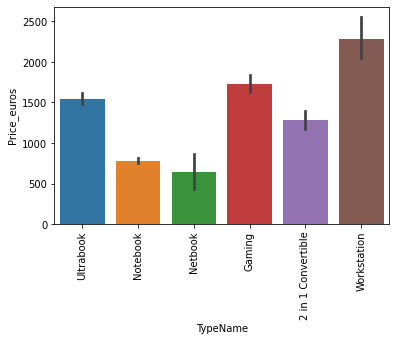

In [24]:
# the above barplot shows that Notebooks are mostly bought.
# now lets see how the laptop types varies with price
sns.barplot(x=df['TypeName'], y=df['Price_euros'])
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

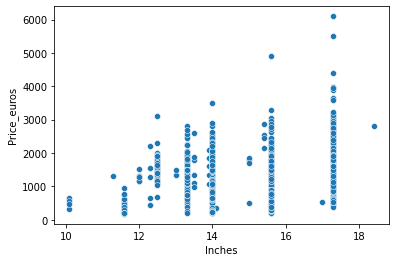

In [25]:
# scatterplot between the inches and the price
sns.scatterplot(x=df['Inches'], y=df['Price_euros'])

## Analysis on Screen Resolution

In [26]:
# let's explore some more.
# The ScreenResolution column is another interesting field
# lets count the screen resolution
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [27]:
# we can see it needs alot of text processing. 
# we notice 2 major screen resolutions: touchscreen and IPS panel
# lets create a TouchScreen column and add to our data set
df['TouchScreen'] = df['ScreenResolution'].apply(lambda screen:1 if 'Touchscreen' in screen else 0)
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Gpu,OpSys,Weight(kg),Price_euros,HDD,SSD,Hybrid,FlashStorage,TouchScreen
1298,6,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,638.0,0,128,0,0,1
1299,6,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,1499.0,0,512,0,0,1
1300,6,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,229.0,0,0,0,0,0
1301,2,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.0,1000,0,0,0,0
1302,4,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,Intel HD Graphics,Windows 10,2.20,369.0,500,0,0,0,0


/Users/fernand/Dev/Laptop-price-prediction/laptop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TouchScreen', ylabel='count'>

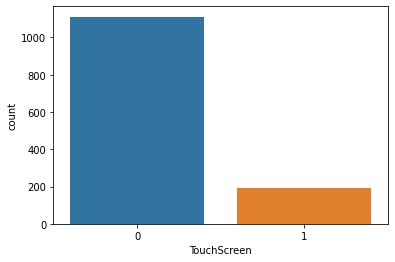

In [28]:
# we can also visualize the count
sns.countplot(df['TouchScreen'])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

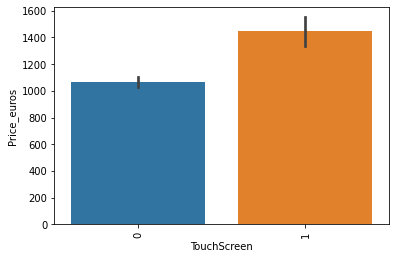

In [29]:
# we can also compare the touchscreen resolution against the price
sns.barplot(x=df['TouchScreen'], y=df['Price_euros'])
plt.xticks(rotation='vertical')

From the last 2 figures, we can see why few people buy the touchscreen laptops. The average price is about 27% increase to the non-touchscreen laptops. 

In [30]:
# now let's look at the IPS Panel screen
# first, lets create a new column IPS
df['IPS'] = df['ScreenResolution'].apply(lambda screen:1 if 'IPS' in screen else 0)
df.head()


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Gpu,OpSys,Weight(kg),Price_euros,HDD,SSD,Hybrid,FlashStorage,TouchScreen,IPS
0,1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,128,0,0,0,1
1,1,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0,0,0
2,2,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,256,0,0,0,0
3,1,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,512,0,0,0,1
4,1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,256,0,0,0,1


/Users/fernand/Dev/Laptop-price-prediction/laptop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IPS', ylabel='count'>

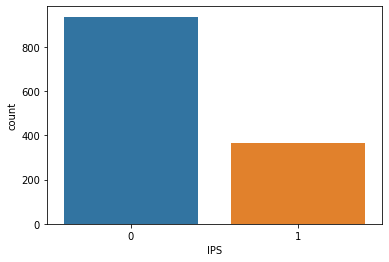

In [31]:
# let's count the IPS screens
sns.countplot(df['IPS'])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

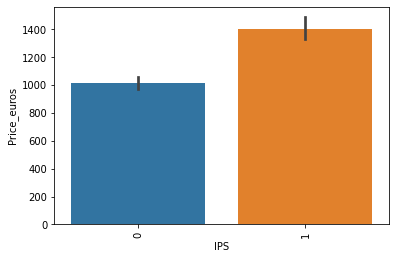

In [32]:
# let's also see how it varies with price
sns.barplot(x=df['IPS'], y=df['Price_euros'])
plt.xticks(rotation='vertical')

From the 2 countplots of the touchscreen and IPS screen resolutions, we will notice that IPS screens are more common with a count of more than 300 while touch screens are below 200 counts.

In [33]:
# right now, we shall extract the width(x) and height(y) parts of the resolution.
xy_resolution = df['ScreenResolution'].str.split('x',n=1, expand=True)
xy_resolution.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [34]:
# create two new columns: XResolution and YResolution
df['XResolution'] = xy_resolution[0]
df['YResolution'] = xy_resolution[1]
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Gpu,OpSys,Weight(kg),Price_euros,HDD,SSD,Hybrid,FlashStorage,TouchScreen,IPS,XResolution,YResolution
0,1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,128,0,0,0,1,IPS Panel Retina Display 2560,1600
1,1,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0,0,0,1440,900
2,2,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,256,0,0,0,0,Full HD 1920,1080
3,1,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,512,0,0,0,1,IPS Panel Retina Display 2880,1800
4,1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,256,0,0,0,1,IPS Panel Retina Display 2560,1600


In [35]:
# looking at the XResolution column, we still have some cleaning to do.
# we achieve this by using regex 
df['XResolution'] = df['XResolution'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda res: res[0])
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Gpu,OpSys,Weight(kg),Price_euros,HDD,SSD,Hybrid,FlashStorage,TouchScreen,IPS,XResolution,YResolution
0,1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,128,0,0,0,1,2560,1600
1,1,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0,0,0,1440,900
2,2,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,256,0,0,0,0,1920,1080
3,1,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,512,0,0,0,1,2880,1800
4,1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,256,0,0,0,1,2560,1600


In [36]:
# finally, lets convert all resolution to numeric type
df['XResolution'] = df['XResolution'].astype('int')
df['YResolution'] = df['YResolution'].astype('int')

<AxesSubplot:>

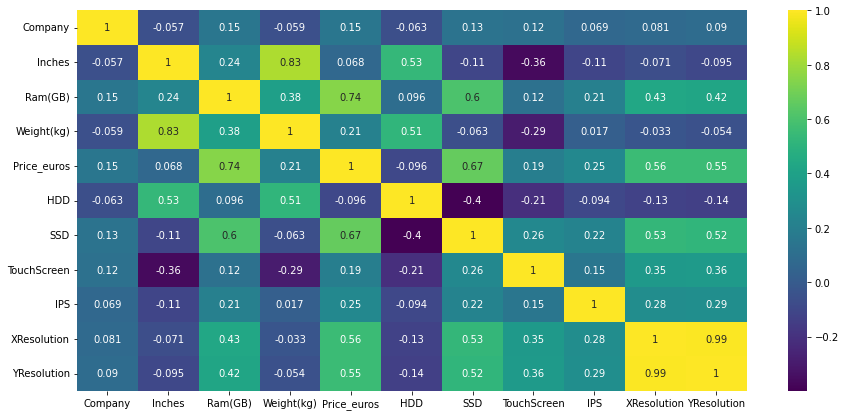

In [37]:
# At this point, lets see how the numerical featuures correlate with each other by using a heatmap
# we shall drop FlashStorage and Hybrid.
df.drop(columns=['FlashStorage', 'Hybrid'], inplace=True)
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [38]:
# let's see how each correlates with price
df.corr()['Price_euros']

Company        0.149303
Inches         0.068197
Ram(GB)        0.743007
Weight(kg)     0.210370
Price_euros    1.000000
HDD           -0.096441
SSD            0.670799
TouchScreen    0.191226
IPS            0.252208
XResolution    0.556529
YResolution    0.552809
Name: Price_euros, dtype: float64

we can see that after the Ram, X&YResolutions are highly correlated with the price positively. So, we can combine X&YResolutions to Inches (that is less correlated with the price) and calculate a new feature called pixels per inch (PPI). 

PPI measures the display resolution, or pixel density, of a computer monitor or screen. The greater the PPI, the greater the detail in the image or dispaly. It is calculated with the given formula:

$$
    PPI = \frac{\sqrt{XResolution^2 + YResolution^2}}{inches}
$$

In [39]:
# let's calculate PPI
df['PPI'] = ((df['XResolution']**2 + df['YResolution']**2)**0.5/df['Inches']).astype('float').round(2)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Gpu,OpSys,Weight(kg),Price_euros,HDD,SSD,TouchScreen,IPS,XResolution,YResolution,PPI
0,1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,128,0,1,2560,1600,226.98
1,1,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0,1440,900,127.68
2,2,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,256,0,0,1920,1080,141.21
3,1,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,512,0,1,2880,1800,220.53
4,1,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,256,0,1,2560,1600,226.98


In [40]:
# let's check the correlation with price again
df.corr()['Price_euros']

Company        0.149303
Inches         0.068197
Ram(GB)        0.743007
Weight(kg)     0.210370
Price_euros    1.000000
HDD           -0.096441
SSD            0.670799
TouchScreen    0.191226
IPS            0.252208
XResolution    0.556529
YResolution    0.552809
PPI            0.473506
Name: Price_euros, dtype: float64

In [41]:
# from the correlation above, PPI has a positive correlation with price. It is the combination of 3 attributes.
# we can drop X&YResolutions from the data frame
df.drop(columns=['XResolution', 'YResolution'], inplace=True)

Analysis on ScreenResolution

In [42]:
# let's extract the x and y pixels
df['ScreenResolution'] = df['ScreenResolution'].str.extract('(\d\d\d\d?x\d\d\d\d?)',expand=True)

In [43]:
# let's map screen resolution from low to high resolution
res_dict={'1366x768' : 1, '1440x900' : 2, '1600x900': 3, '1920x1080': 4, '1920x1200': 5, '2160x1440': 6,
                 '2304x1440': 7, '2256x1504': 8, '2560x1440': 9, '2400x1600':10, '2560x1600':11, '2736x1824':12,
                  '2880x1800':13, '3200x1800': 14, '3840x2160':15}

df['ScreenResolution'] = df.ScreenResolution.map(res_dict)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram(GB),Gpu,OpSys,Weight(kg),Price_euros,HDD,SSD,TouchScreen,IPS,PPI
0,1,MacBook Pro,Ultrabook,13.3,11,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,128,0,1,226.98
1,1,Macbook Air,Ultrabook,13.3,2,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,0,127.68
2,2,250 G6,Notebook,15.6,4,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,256,0,0,141.21
3,1,MacBook Pro,Ultrabook,15.4,13,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,512,0,1,220.53
4,1,MacBook Pro,Ultrabook,13.3,11,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,256,0,1,226.98


## Analysis on Cpu

In [44]:
# another feature that needs text processing is the Cpu column
# let's look at this column
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

Most common processors are made by Intel, and this data set agrees with that. 
We shall group the Intel processores in to 4 categories: i3, i5, i7 and others(like M).
However, there are 2 more processors: AMD and Samsung. Since we just have just one Samsung Cortex
processor in the data set, we shall cluster it as AMD.

In [45]:
# let's extract the just the Cpu type first
df['CpuName'] = df['Cpu'].apply(lambda cpu:" ".join(cpu.split()[:3]))

In [46]:
# let's use LabelEncoder to convert CpuName to numeric
# initialize LabelEncoder
le = LabelEncoder()

Cpu_list = list(df['CpuName'].unique())

Cpu_le = list(le.fit_transform(df['CpuName'].unique()))

for i in range(0, len(Cpu_list)):
    print("%-20s%d"%(Cpu_list[i], Cpu_le[i]))

Intel Core i5       33
Intel Core i7       34
AMD A9-Series 9420  11
Intel Core i3       32
Intel Core M        31
Intel Atom x5-Z8350 27
AMD E-Series E2-9000e19
Intel Atom x5-Z8300 26
AMD E-Series E2-611017
AMD A6-Series 9220  7
Intel Celeron Dual  29
AMD Ryzen 1700      23
Intel Pentium Quad  36
Intel Atom x5-Z8550 28
AMD FX 9830P        21
AMD E-Series 6110   13
Intel Xeon E3-1505M 37
AMD E-Series 9000e  16
AMD A10-Series A10-9620P2
AMD A6-Series A6-92208
AMD A10-Series 9600P0
AMD A8-Series 7410  9
AMD A12-Series 9720P4
Intel Celeron Quad  30
AMD Ryzen 1600      22
AMD A10-Series 9620P1
AMD E-Series 7110   14
AMD A9-Series A9-942012
Intel Xeon E3-1535M 38
AMD E-Series E2-900018
AMD A6-Series 7310  6
Intel Atom Z8350    25
Intel Pentium Dual  35
AMD A12-Series 9700P3
AMD A4-Series 7210  5
AMD FX 8800P        20
Intel Atom X5-Z8350 24
Samsung Cortex A72&A5339
AMD E-Series 9000   15
AMD A9-Series 9410  10


In [47]:
df['CpuName'] = le.fit_transform(df['CpuName'])

From the price barplot, it seems Intel core i3 and i5 are the most commonly bought. One could say that this would be for most business and study purposes. However, for gaming and intense processor use, Intel Core i7 is appropriate and costly with an average of 1600 euros.

In [48]:
# we no longer need the Cpu column
df.drop(columns=['Cpu'], inplace=True)

/Users/fernand/Dev/Laptop-price-prediction/laptop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ram(GB)', ylabel='count'>

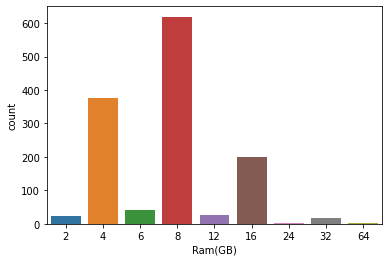

In [49]:
# let's see the laptops with the most used Ram
sns.countplot(df['Ram(GB)'])

/Users/fernand/Dev/Laptop-price-prediction/laptop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ram(GB)', ylabel='Price_euros'>

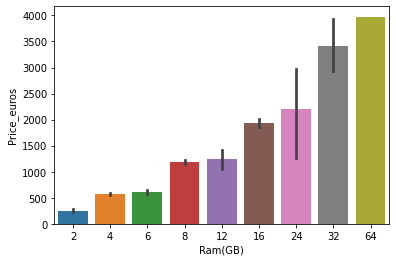

In [50]:
# let's visualize Ram since it is strongly correlated to the price
sns.barplot(df['Ram(GB)'], df['Price_euros'])  

There is a linear relationship between price and ram. As the ram increases so is the price. 8GB Ram is the commonly used with the avreage price of 1200 euros.

## Analysis on Gpu

In [51]:
# let's see the unique values of Gpu
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

/Users/fernand/Dev/Laptop-price-prediction/laptop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GpuBrand', ylabel='count'>

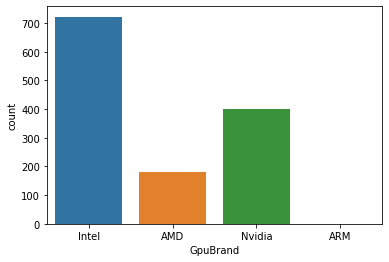

In [52]:
# In this analysis, we will focus just the different brand of Gpu due to the size of the data.
df['GpuBrand'] = df['Gpu'].apply(lambda x: x.split()[0])
sns.countplot(df['GpuBrand'])

/Users/fernand/Dev/Laptop-price-prediction/laptop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GpuBrand', ylabel='Price_euros'>

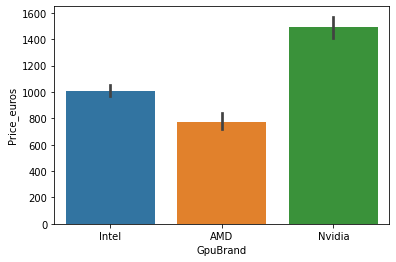

In [53]:
# From the countplot above, the Gpu brand ARM is neglegible.
# We will ignore it and compare the brand against price.
df = df[df['GpuBrand'] != 'ARM']
sns.barplot(df['GpuBrand'], df['Price_euros'])

From the barplot, the most Gpu brand purchased is Intel.

In [54]:
# Convert gup brands to numeric
gpu_list = list(df['GpuBrand'].unique())

gpu_le = list(le.fit_transform(df['GpuBrand'].unique()))

for i in range(0, len(gpu_list)):
    print("%-20s%d"%(gpu_list[i], gpu_le[i]))

Intel               1
AMD                 0
Nvidia              2


In [55]:
df['GpuBrand'] = le.fit_transform(df['GpuBrand'])

In [56]:
# let's drop the Gpu column
# Also, since we have the Company and GpuBrand columns we can as well drop the Product column.
df.drop(columns = ['Gpu', 'Product'], inplace=True)

Analysis on OS

In [57]:
# let's see the unique counts of OS
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

/Users/fernand/Dev/Laptop-price-prediction/laptop/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

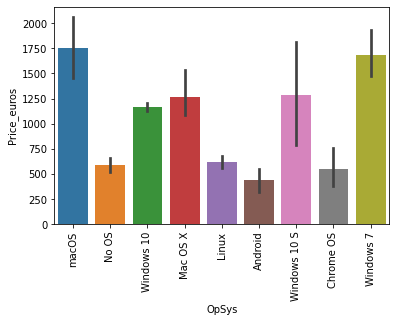

In [58]:
# let's compare it against the price
sns.barplot(df['OpSys'], df['Price_euros'])
plt.xticks(rotation = 'vertical')

We notice that, windows 10 is widely used OS.

In [59]:
# Group operating systems to 4 subcategories Windows, macOS, Linux and Others
def Cluster_OS(opsys):
    """
    Cluster operating systems into subcategories.
    Windows: Windows 10, Windows 10 S, and Windows 7
    Mac: Mac OS X and macOS
    Linux: Linux
    Others: Chrome OS, Andriod, and No OS
    """
    if opsys in ('Windows 10', 'Windows 10 S', 'Windows 7'):
        return 'Windows'
    elif opsys in ('macOS', 'Mac OS X'):
        return 'Mac'
    elif opsys == 'Linux':
        return 'Linux'
    return 'Others'

df['OpSys'] = df['OpSys'].apply(lambda opsys: Cluster_OS(opsys))
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram(GB),OpSys,Weight(kg),Price_euros,HDD,SSD,TouchScreen,IPS,PPI,CpuName,GpuBrand
0,1,Ultrabook,13.3,11,8,Mac,1.37,1339.69,0,128,0,1,226.98,33,1
1,1,Ultrabook,13.3,2,8,Mac,1.34,898.94,0,0,0,0,127.68,33,1
2,2,Notebook,15.6,4,8,Others,1.86,575.00,0,256,0,0,141.21,33,1
3,1,Ultrabook,15.4,13,16,Mac,1.83,2537.45,0,512,0,1,220.53,34,0
4,1,Ultrabook,13.3,11,8,Mac,1.37,1803.60,0,256,0,1,226.98,33,1


In [60]:
# Let's preprocess OpSys
opsys_dict={'Windows' : 1, 'Mac' : 2, 'Linux': 3, 'Others': 4}
df['OpSys'] = df.OpSys.map(opsys_dict)

In [61]:
# Let's preprocess TypeName
type_dict={'Ultrabook' : 1, 'Notebook' : 2, 'Netbook': 3, 'Gaming': 4, '2 in 1 Convertible': 5, 'Workstation': 6}
df['TypeName'] = df.TypeName.map(type_dict)
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram(GB),OpSys,Weight(kg),Price_euros,HDD,SSD,TouchScreen,IPS,PPI,CpuName,GpuBrand
0,1,1,13.3,11,8,2,1.37,1339.69,0,128,0,1,226.98,33,1
1,1,1,13.3,2,8,2,1.34,898.94,0,0,0,0,127.68,33,1
2,2,2,15.6,4,8,4,1.86,575.00,0,256,0,0,141.21,33,1
3,1,1,15.4,13,16,2,1.83,2537.45,0,512,0,1,220.53,34,0
4,1,1,13.3,11,8,2,1.37,1803.60,0,256,0,1,226.98,33,1


/Users/fernand/Dev/Laptop-price-prediction/laptop/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

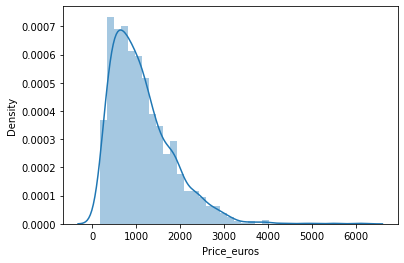

In [62]:
# let's check the distribution of the price
sns.distplot(df['Price_euros'])

The price is skewed to the right indicating a that the mean is greater than the median and the mode. 
To train a linear regression model we need to assume normality (i.e. Gaussian/normal distribution)

/Users/fernand/Dev/Laptop-price-prediction/laptop/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

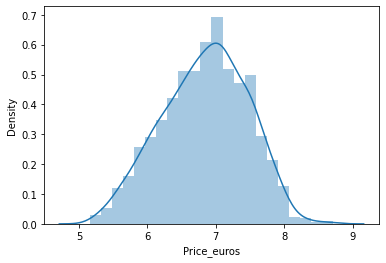

In [63]:
# let's transform the price column to follow a normal distribtution
sns.distplot(np.log(df['Price_euros']))

Right now it's normally distributed.

In [64]:
# finally, we can how the other features correlates with the target variable
df.corr()['Price_euros'] 

Company             0.152343
TypeName            0.293605
Inches              0.067329
ScreenResolution    0.538104
Ram(GB)             0.742905
OpSys              -0.265062
Weight(kg)          0.209867
Price_euros         1.000000
HDD                -0.096891
SSD                 0.670660
TouchScreen         0.192917
IPS                 0.253320
PPI                 0.475387
CpuName             0.312447
GpuBrand            0.355788
Name: Price_euros, dtype: float64

In [65]:
# let's save for model training
df.to_csv('model_training.csv', index=None)